# Домашня робота №10

# Закон великих чисел, метод Монте-Карло, центральна гранична теорема

Деякі задачі взяті з підручника

*Збірник задач з теорії ймовірностей та математичної статистики: навч. посібник / В.В. Голомозий, М.В. Карташов, К.В. Ральченко. – К.: Видавничо-поліграфічний центр «Київський університет», 2015. – 366 с.*

Електронну версію збірника можна знайти [за посиланням](http://probability.univ.kiev.ua/userfiles/kmv/gkr-problems.pdf).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Закон великих чисел (посилений)

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., $E[\xi_1] = \mu$.
Тоді
$$
\frac{\xi_1 + \ldots + \xi_n}{n} \to \mu, \qquad n \to \infty, \quad \text{м.н.}
$$
Позначимо також $S_n = \xi_1 + \ldots + \xi_n$.

### 1.1 Геометричний розподіл

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., де $\xi_n \sim Geom(p), n \geq 1$.

Зобразіть графічно збіжність із закону великих чисел для кожного параметра $p = 0.05, 0.25, 0.5, 0.75, 0.95$.

Позначимо $S_n = \xi_1 + \ldots + \xi_n$.

1. Зобразіть графік функції $\frac{S_n}{n}$ в залежності від $n = 1, \ldots, 1000$ для кожного $p$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\frac{S_n}{n}$.



**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum` або відповідний метод.

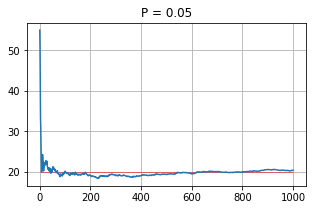

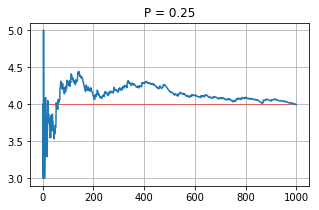

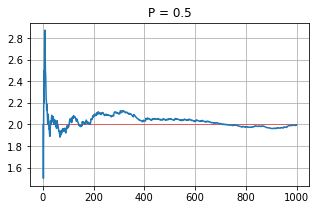

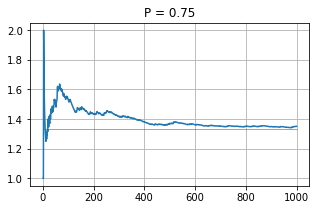

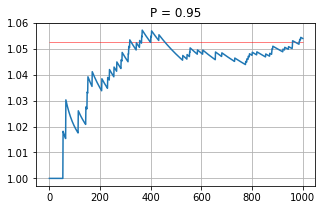

In [3]:
from scipy.stats import geom


params = (0.05, 0.25, 0.5, 0.75, 0.95)
n = 1000
for p in params:
    
    fig = plt.gcf()
    fig.set_size_inches(5, 3)
     
    xi = geom(p)
    rvs = xi.rvs(size=n)

    cumulative = rvs.cumsum()
    N = np.arange(1, n + 1)
    plt.plot(N, cumulative/N)
    plt.hlines(1/p, 0, len(N), 'r', linewidth=0.5)
    plt.title(f'P = {p}')
    plt.grid()
    plt.show()

### 1.2 Рівномірний розподіл

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., де $\xi_n \sim Uniform(a, b), n \geq 1$.

Зобразіть графічно збіжність із закону великих чисел для кожної пари параметрів $[a, b] = [0, 1], [-1, 1], [-2, 5]$.

Позначимо $S_n = \xi_1 + \ldots + \xi_n$.

1. Зобразіть графік функції $\frac{S_n}{n}$ в залежності від $n = 1, \ldots, 1000$ для кожної пари $[a, b]$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\frac{S_n}{n}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum` або відповідний метод.

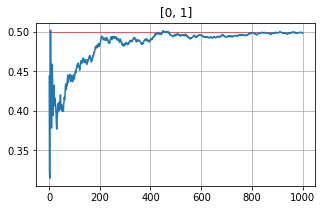

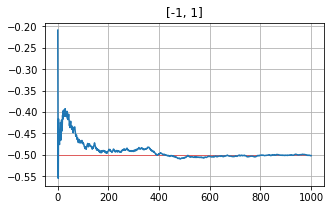

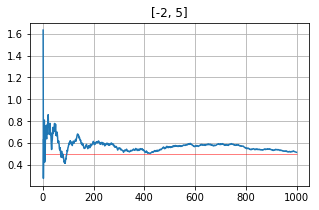

In [4]:
from scipy.stats import uniform


params = ((0, 1), (-1, 1), (-2, 5))
n = 1000

for a, b in params:
    
    fig = plt.gcf()
    fig.set_size_inches(5, 3)
     
    xi = uniform(a, b)

    rvs = xi.rvs(size=n)
    
    
    cumulative = rvs.cumsum()
    N = np.arange(1, n + 1)
    plt.plot(N, cumulative/N)
    plt.hlines(xi.expect(lambda x: x), 0, len(N), 'r', linewidth=0.5)
    plt.title(f'[{a}, {b}]')
    plt.grid()
    plt.show()


### 1.3 Задача 1.18.19

Випадкові величини $(\epsilon_n, n \geq -m)$ незалежні однаково розподілені та квадратично інтегровні.
Довести, що для величин $\xi_n = \sum_{k=0}^{m} c_k \epsilon_{n-k}$
виконується закон великих чисел, де $c_k$ &mdash; довільні сталі.

Нехай $\epsilon_n \sim N(0, 1)$.
Сталі $c_0, \ldots, c_m$ згенеруйте зі стандартного рівномірного розподілу.

Зобразіть графічно збіжність із закону великих чисел для $\xi_n$ для кожного параметра $m = 1, 3, 5, 10, 25, 50, 100$.

Позначимо $S_n = \xi_0 + \ldots + \xi_n$.

1. Зобразіть графік функції $\frac{S_n}{n}$ в залежності від $n = 1, \ldots, 10000$ для кожного $m$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\frac{S_n}{n}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum` або відповідний метод.

$$
\begin{aligned}
    \xi_0 &= c_0\epsilon_0 + c_1\epsilon_{-1} + \dots + c_m\epsilon_{-m}\\
    \xi_1 &= c_0\epsilon_1 + c_1\epsilon_{0} + \dots + c_m\epsilon_{1 - m}\\
    \dots \\
    \xi_n &= c_0\epsilon_n + c_1\epsilon_{n-1} + \dots + c_m\epsilon_{n - m}
\end{aligned}
$$

We can rewrite given identities into the matrix form:

$$
\begin{pmatrix}
    \epsilon_0 & \epsilon_{-1} & \dots & \epsilon_{-m}\\
    \epsilon_1 & \epsilon_{0} & \dots & \epsilon_{1-m}\\
    \dots \\
    \epsilon_n & \epsilon_{n-1}& \dots & \epsilon_{n -m}
\end{pmatrix} 
\begin{pmatrix}
    c_0 \\ c_1 \\ \dots \\ c_m
\end{pmatrix} =
\begin{pmatrix}
    \xi_0 \\ \xi_1 \\ \dots \\ \xi_n
\end{pmatrix}
$$

And now we can simply genertate $n + m + 1$ values of $\epsilon_{i}$, $m + 1$ value of $c_i$, build given matrix and 
derive vector $\overrightarrow{\xi}$

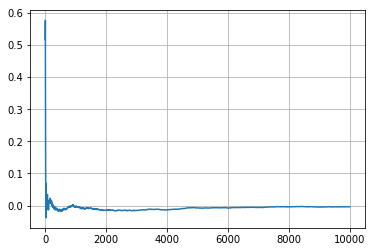

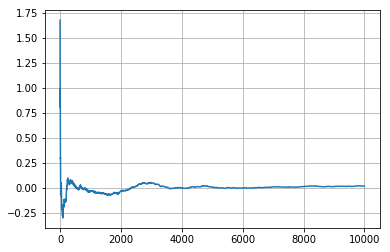

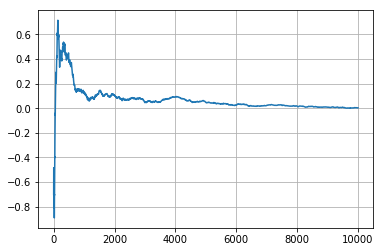

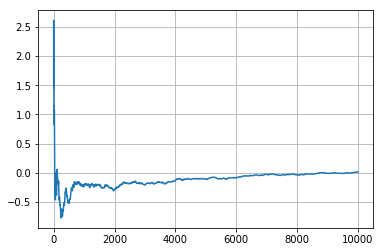

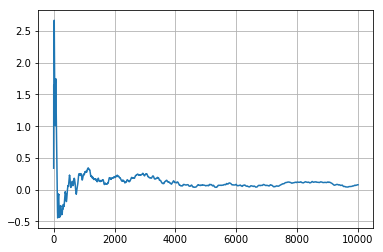

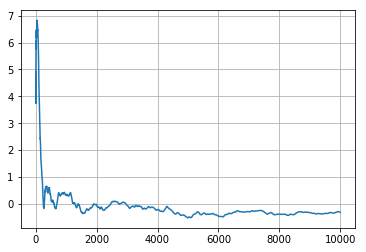

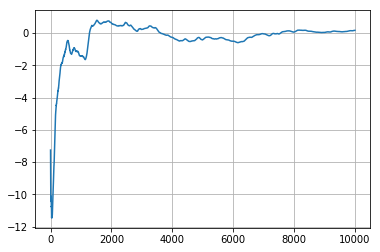

In [7]:
from scipy.stats import norm
from collections import deque


def build_xi_n(n, m):
    eps_rvs = norm(0, 1).rvs(size=n+m+1)
    c_rvs = uniform(0, 1).rvs(size=m+1)
    
    d = deque(eps_rvs[:m + 1])
    eps_matrix = []
    for i in range(n):
        cur = eps_rvs[i + m + 1]
        eps_matrix.append(list(d))
        d.appendleft(cur)
        d.pop()
    m = np.matrix(eps_matrix)
    c_vec = np.matrix([[c] for c in c_rvs])
    res = m * c_vec
    return np.array(res.flat)


    
n = 10000
m_vals = [1, 3, 5, 10, 25, 50, 100]
for m in m_vals:
    xi_vec = build_xi_n(n, m)
    N = np.arange(1, n + 1)
    plt.plot(N, xi_vec.cumsum()/N)
    plt.grid()
    plt.show()

## 2 Метод Монте-Карло

Метод Монте-Карло полягає в наближеному обчисленні інтегралів за допомогою випадкових величин.
$$
\idotsint_{A} f \left( \overrightarrow{x} \right) \, d\overrightarrow{x} 
= \idotsint_{\mathbf{R^d}} f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right) \, d\overrightarrow{x}
= \idotsint_{\mathbf{R^d}}
\frac{f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right)}{f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right)}
f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right) \, d\overrightarrow{x}
= E \left[ \frac{f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right)}
{f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right)} \right]
\approx \\
\frac{1}{n} \sum_{i=1}^{n} \frac{f \left( \overrightarrow{\xi}_i \right) I_{A} \left( \overrightarrow{\xi}_i \right)}
{f_{\overrightarrow{\xi}} \left( \overrightarrow{\xi}_i \right)},
$$
де $f$ &mdash; деяка функція,
$I_B$ &mdash; індикатор множини $B$,
$\overrightarrow{\xi}, \overrightarrow{\xi}_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в. на множині $C \supset A$
зі щільністю $f_{\overrightarrow{\xi}}$.

Або, в одномірному випадку,
$$
\int_{a}^{b} f(x) \, dx
= \int_{-\infty}^{+\infty} f(x) I_{(a, b)}(x) \, dx
= \int_{-\infty}^{+\infty} \frac{f(x) I_{(a, b)}(x)}{f_{\xi}(x)} f_{\xi}(x) \, dx
= E\left[ \frac{f(\xi) I_{(a, b)}(\xi)}{f_{\xi}(\xi)} \right]\\
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)},
$$
де $a, b \in \mathbf{R} \cup \{-\infty, +\infty\}$,
$I_B$ &mdash; індикатор множини $B$,
$f$ &mdash; деяка функція,
$\xi, \xi_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в. на множині $A \supset (a, b)$ зі щільністю $f_{\xi}$.

Або
$$
\int_{A} f(x) \, dx
= E\left[ f(\xi) \right] m(A)
\approx \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A),
$$
де $f$ &mdash; деяка функція,
$\xi, \xi_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в., рівномірно розподілені на множині $A$.

### 2.1 Завдання 2.1

Порахуйте наближено $\displaystyle \int_{0}^{1} \sin x \, dx$ за допомогою метода Монте-Карло.

1. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A)$
в залежності від $n = 1, \ldots, 1000$.
2. Додайте горизонтальну пряму, яка відповідає теоретичному значенню інтеграла, тобто до якого прямує вираз
$\displaystyle \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A)$.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum`.

**Зауваження 2.** При розв'язанні даної задачі зручно взяти $\xi_i \sim Uniform(0, 1)$.

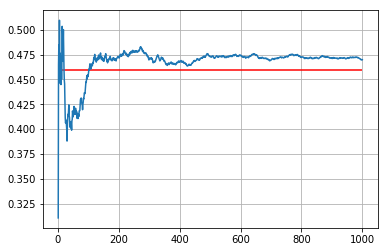

In [38]:
rvs = uniform(0, 1).rvs(size=n)
sin_rvs = np.sin(rvs)
N = np.arange(1, n + 1)
reference_val = -np.cos(1) + np.cos(0)

plt.plot(N, sin_rvs.cumsum()/N)
plt.hlines(reference_val, 0, n, 'r')
plt.grid()
plt.show()



### 2.2 Завдання 2.2

Порахуйте наближено $\displaystyle \int_{1}^{\infty} \frac{1}{x^3} \, dx$ за допомогою метода Монте-Карло.

1. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$
в залежності від $n = 1, \ldots, 10000$,
де $\xi, \xi_i \sim Exp(1)$.
2. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$
в залежності від $n = 1, \ldots, 10000$,
де $\xi, \xi_i \sim N(0, 1)$.
3. Додайте горизонтальну пряму, яка відповідає теоретичному значенню інтеграла, тобто до якого прямує вираз
$\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$.
4. Порівняйте точність наближення з пунктів $1, 2$.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum`.

**Зауваження 2.** Замість введення індикатора можна взяти такі $\xi_i$, що $(\xi_i - 1) \sim Exp(1)$.
Тобто поставити параметр `loc=1`.
Тоді
$$
\int_{1}^{\infty} f(x) \, dx
= \int_{1}^{\infty} \frac{f(x)}{f_{\xi}(x)} f_{\xi}(x) \, dx
= E\left[ \frac{f(\xi)}{f_{\xi}(\xi)} \right]
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i)}{f_{\xi}(\xi_i)}.
$$

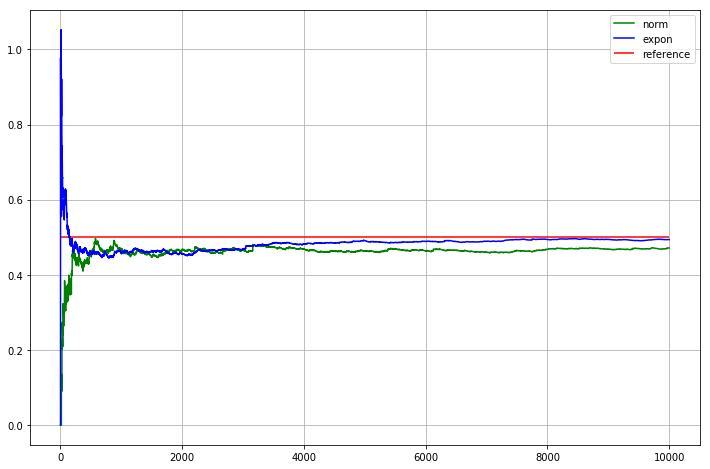

In [62]:
from scipy.stats import expon

fig = plt.gcf()
fig.set_size_inches(12, 8)

n = 10_000
N = np.arange(1, n + 1)

xi = norm(0, 1)
etha = expon(0, 1)

@np.vectorize
def f(x): return x**(-3)

@np.vectorize
def indicator(x): return int(1 <= x)

norm_rvs = xi.rvs(size=n)
expon_rvs = etha.rvs(size=n)

func_norm_vals = f(norm_rvs)
func_expon_vals = f(expon_rvs)

pdf_norm_vals = xi.pdf(norm_rvs)
pdf_expon_vals = etha.pdf(expon_rvs)

indic_norm_vals = indicator(norm_rvs)
indic_expon_vals = indicator(expon_rvs)

sum_terms_norm = (func_norm_vals * indic_norm_vals) / pdf_norm_vals
sum_terms_expon = (func_expon_vals * indic_expon_vals) / pdf_expon_vals

plt.plot(N, sum_terms_norm.cumsum()/N, 'g')
plt.plot(N, sum_terms_expon.cumsum()/N, 'b')
plt.hlines(0.5, 1, n + 1, 'r')
plt.legend(('norm', 'expon', 'reference'))

# print(list(sum_terms_expon))
# print(sum_terms_expon.cumsum())

plt.grid()
plt.show()

### 2.3 Завдання 2.3

Порахуйте наближено $\displaystyle \int_{-\infty}^{+\infty} e^{-|x|} \, dx$ за допомогою метода Монте-Карло.

1. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$
в залежності від $n = 1, \ldots, 10000$,
де $\xi, \xi_i \sim N(0, 1)$.
2. Додайте горизонтальну пряму, яка відповідає теоретичному значенню інтеграла, тобто до якого прямує вираз
$\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum`.

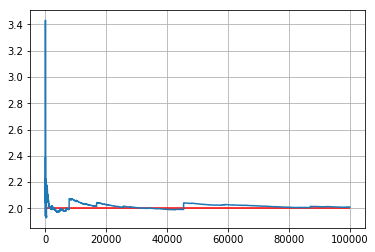

In [72]:
@np.vectorize
def g(x): return np.exp(-abs(x))

n = 100_000
N = np.arange(1, n + 1)

norm_rvs = norm(0, 1).rvs(size=n)
func_vals = g(norm_rvs)
pdf_vals = norm(0, 1).pdf(norm_rvs)

sum_terms = func_vals/pdf_vals

plt.plot(N, sum_terms.cumsum()/N)
plt.hlines(2, 1, n, 'r')
plt.grid()


## 3 Центральна гранична теорема

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., $E[\xi_1] = \mu, D(\xi_1) = \sigma^2$.
Позначимо також $S_n = \xi_1 + \ldots + \xi_n$.
Тоді
$$
\sqrt{n} \left( \frac{S_n}{n} - \mu \right) = \frac{1}{\sqrt{n}} \sum_{i=1}^{n} (\xi_i - \mu) \to \zeta,
\qquad n \to \infty,
$$
де $\zeta \sim N(0, \sigma^2)$.

### 3.1 Експоненційний розподіл

Нехай $(\xi_k, k \geq 1)$ &mdash; н.о.р.в.в., де $\xi_k \sim Exp(1), k \geq 1$.

Зобразіть графічно збіжність із центральної граничної теореми.

Для кожного $n = 1, 2, 3, 5, 10, 25, 50, 100, 200$ зобразіть:
- нормовану гістограму $n\_samples = 10000$ значень виразу
$\displaystyle \frac{1}{\sqrt{n}} \sum_{i=1}^{n} (\xi_i - \mu)$, де $\mu = E[\xi_1]$;
- графік функції щільності $\zeta \sim N(0, \sigma^2)$, де $\sigma^2 = D(\xi_1)$.

**Зауваження.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функцію `numpy.sum(axis=1)`.

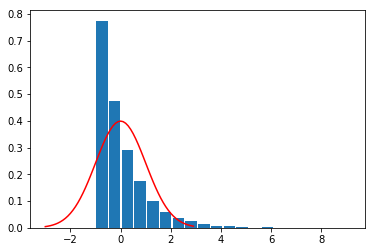

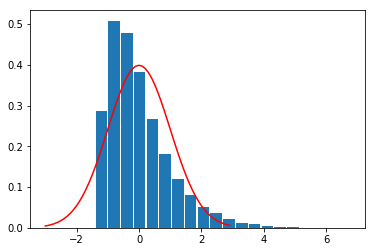

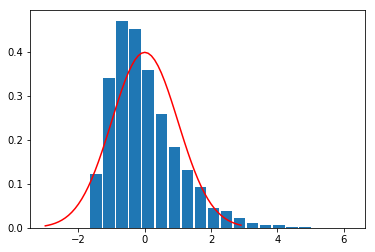

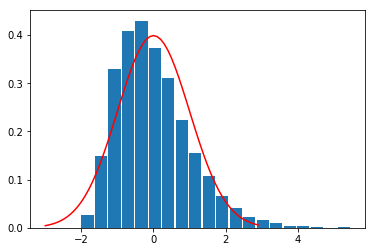

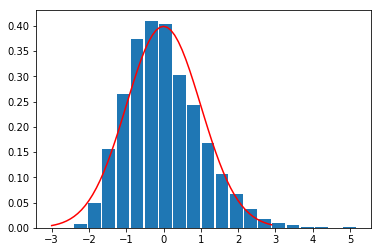

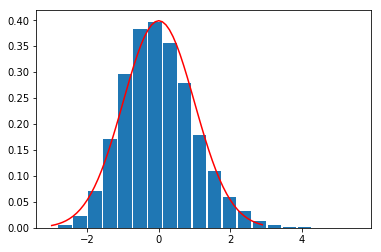

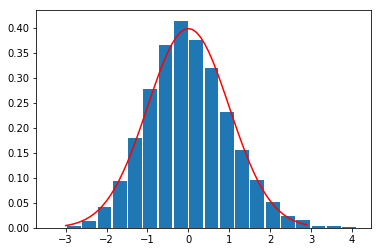

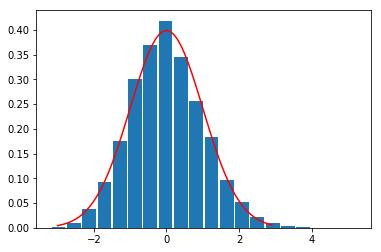

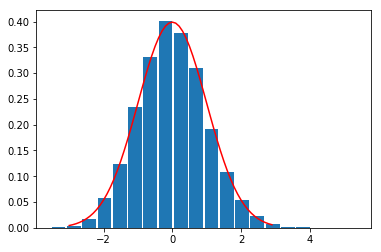

In [99]:
def _build_xi(n_samples, n, distr):
    res = []
    for i in range(n_samples):
        row = distr.rvs(size=n)
        res.append(row)
    return np.matrix(res)


xi_matrix = _build_xi(n_samples, 200, expon(0, 1))


for n in (1,2,3,5,10,25,50,100,200):
    n_samples = 10000
    distr = expon(0, 1)

    cur_xi_matrix = xi_matrix[:, :n]
    new_values = (cur_xi_matrix.sum(axis=1) - n) * 1/(np.sqrt(n))
    plt.hist(new_values, rwidth=0.9, density=True, bins=20)

    t = np.arange(-3, 3, 0.1)
    plt.plot(t, norm(0, 1).pdf(t), 'r')
    plt.show()

### 3.2 Задача 1.23.24

Випадкові величини $(\xi_k, k \geq 1)$ невід'ємні незалежні однаково розподілені, $E[\xi_1] = 1, D(\xi_1) = \sigma^2$.
Довести, що
$\displaystyle 2 \left( \sqrt{\xi_1 + \ldots + \xi_n} - \sqrt{n} \right)
\xrightarrow{w} \sigma \zeta \sim N(0, \sigma^2), \quad n \to \infty$.

Нехай $\xi_k \sim Exp(1)$.

Зобразіть графічно описану в задачі збіжність.

Для кожного $n = 1, 2, 3, 5, 10, 25, 50, 100$ зобразіть:
- нормовану гістограму $n\_samples = 10000$ значень виразу
$\displaystyle 2 \left( \sqrt{\xi_1 + \ldots + \xi_n} - \sqrt{n} \right)$;
- графік функції щільності $\sigma \zeta \sim N(0, \sigma^2)$.

**Зауваження 1.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функції `numpy.sum(axis=1)`.

**Зауваження 2.** $\xrightarrow{w}$ означає *слабку збіжність* (від англ. *weak*) або *збіжність за розподілом*.
$\xi_n \xrightarrow{w} \xi, n \to \infty$, якщо $P(\xi_n < x) \to P(\xi < x), n \to \infty$,
в усіх точках неперервності функції розподілу випадкової величини $\xi$.

**Зауваження 3.** Якщо $\sigma \zeta \sim N(0, \sigma^2)$, то $\zeta \sim N(0, 1)$.

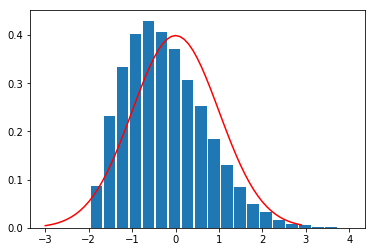

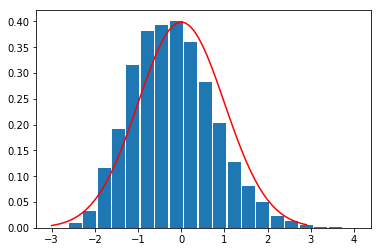

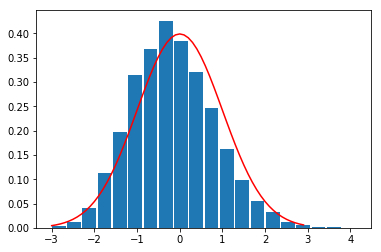

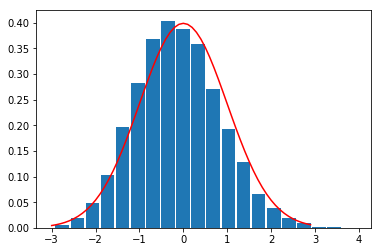

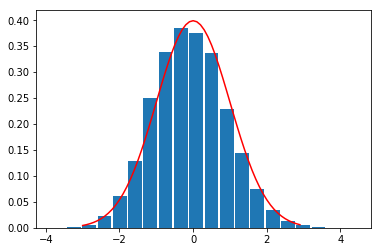

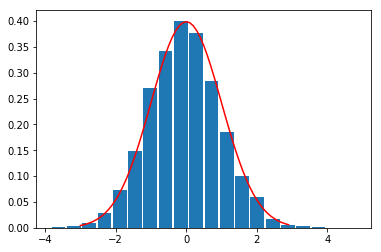

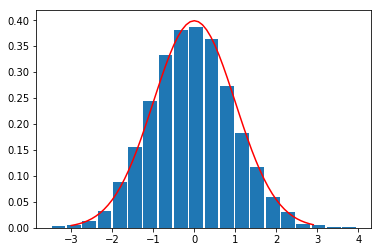

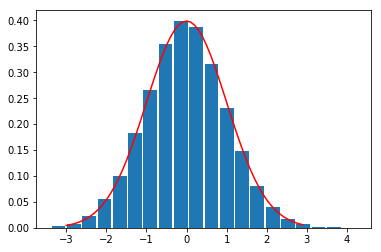

In [102]:
xi_matrix = _build_xi(n_samples, 100, expon(0, 1))


for n in (1,2,3,5,10,25,50,100):
    n_samples = 10000
    distr = expon(0, 1)

    cur_xi_matrix = xi_matrix[:, :n]
    new_values = 2*(np.sqrt(cur_xi_matrix.sum(axis=1)) - np.sqrt(n))
    plt.hist(new_values, rwidth=0.9, density=True, bins=20)

    t = np.arange(-3, 3, 0.1)
    plt.plot(t, norm(0, 1).pdf(t), 'r')
    plt.show()




### 3.3 Задача 1.18.35

Випадкові величини $(\xi_k, k \geq 1)$ незалежні рівномірно розподілені:
$\xi_k \sim Uniform(0, 1), \xi_{(1:n)} = \min_{1 \leq k \leq n} \xi_k, \xi_{(n:n)} = \max_{1 \leq k \leq n} \xi_k$.
Довести, що:
$\displaystyle
\xi_{(1:n)} \xrightarrow{P} 0,
\xi_{(n:n)} \xrightarrow{P} 1,
n \xi_{(1:n)} \xrightarrow{P} \zeta,
n \left( 1 - \xi_{(n:n)} \right) \xrightarrow{P} \zeta,
\quad n \to \infty$, де $\zeta \sim Exp(1)$.

Зобразіть графічно описані в задачі збіжності.

1. Реалізуйте 2 сабплоти в 1 рядку.
2. На першому сабплоті:
   - Зобразіть графік функції $\xi_{(1:n)}$ в залежності від $n = 1, \ldots, 1000$.
   - Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\xi_{(1:n)}$.
3. На другому сабплоті:
   - Зобразіть графік функції $\xi_{(n:n)}$ в залежності від $n = 1, \ldots, 1000$.
   - Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\xi_{(n:n)}$.
4. Для кожного $n = 1, 2, 3, 5, 10$ реалізуйте два сабплоти:
   1. На першому сабплоті зобразіть:
      - нормовану гістограму $n\_samples = 10000$ значень виразу $n \xi_{(1:n)}$;
      - графік функції щільності $\zeta \sim Exp(1)$.
   2. На другому сабплоті зобразіть:
      - нормовану гістограму $n\_samples = 10000$ значень виразу $n \left( 1 - \xi_{(n:n)} \right)$;
      - графік функції щільності $\zeta \sim Exp(1)$.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функції `numpy.minimum.accumulate` та `numpy.maximum.accumulate`.

**Зауваження 2.** $\xrightarrow{P}$ означає *збіжність за ймовірністю*.

**Зауваження 3.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функції `numpy.min(axis=1)` та `numpy.max(axis=1)`.

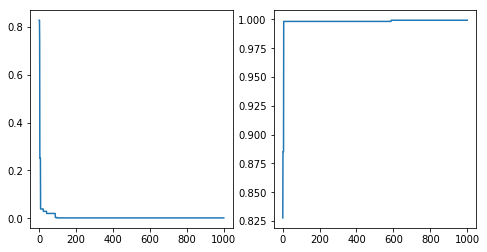

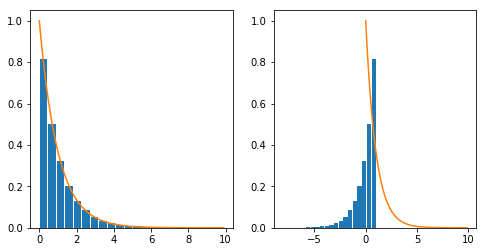

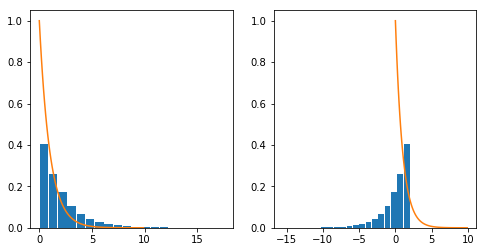

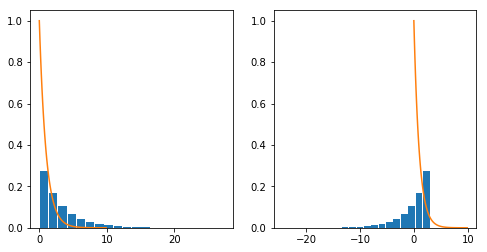

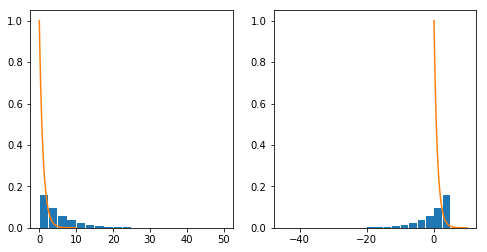

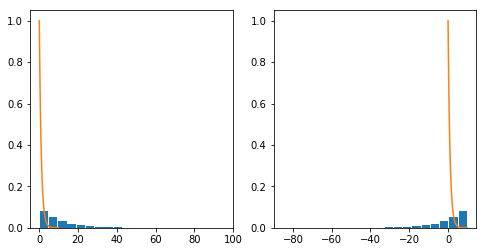

In [115]:
n = 1000

fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(121)
rvs = uniform(0, 1).rvs(size=n)
mins = np.minimum.accumulate(rvs)
ax1.plot(np.arange(1, n + 1), mins)

ax2 = fig.add_subplot(122)
maxs = np.maximum.accumulate(rvs)
ax2.plot(np.arange(1, n + 1), maxs)

n_samples = 10_000
xi_matrix = _build_xi(n_samples, 10, expon(0, 1))

for n in (1, 2, 3, 5, 10):
    cur_xi_matrix = xi_matrix[:, n - 1]
    fig = plt.figure(figsize=(8, 4))
    
    ax1 = fig.add_subplot(121)
    dzeta1 = n*cur_xi_matrix.min(axis=1)
    ax1.hist(dzeta1, density=True, rwidth=0.9, bins=20)
    t = np.arange(0, 10, 0.1)
    ax1.plot(t, expon(0, 1).pdf(t))
    
    ax2 = fig.add_subplot(122)
    dzeta2 = n*(1 - cur_xi_matrix.max(axis=1))
    ax2.hist(dzeta2, density=True, rwidth=0.9, bins=20)
    ax2.plot(t, expon(0, 1).pdf(t))

plt.show()

